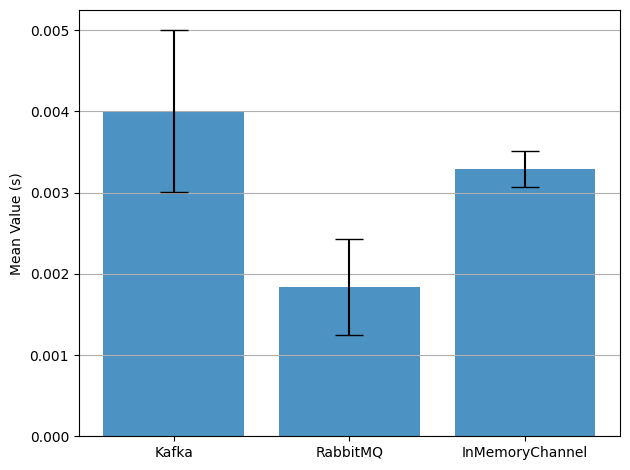

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Load Kafka values (skip header)
with open('latenciesKafka2.txt', 'r') as f:
    kafka_values = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]

# Load RabbitMQ values (skip header)
with open('latenciesRabbit2.txt', 'r') as f:
    rabbitmq_values = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]

with open('latenciesInMem2.txt', 'r') as f:
    InMem_values = [float(line.strip()) for line in f.readlines()[1:] if line.strip()]


# Compute mean and std deviation
means = [np.mean(kafka_values), np.mean(rabbitmq_values), np.mean(InMem_values)]
errors = [np.std(kafka_values), np.std(rabbitmq_values), np.std(InMem_values)]
labels = ['Kafka', 'RabbitMQ', "InMemoryChannel"]

# Plotting
x = np.arange(len(labels))
fig, ax = plt.subplots()

ax.bar(x, means, yerr=errors, align='center', alpha=0.8, ecolor='black', capsize=10)
ax.set_ylabel('Mean Value (s)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

plt.savefig('rabbit_vs_kafka_vs_InMemory.png', dpi=300)

plt.tight_layout()
plt.show()
